# QURAN & NLP 

### This notebook is an attempt to visualise and demonstrate how the use of AI techniques can be used to better understand the depths of Islamic knowledge

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [50]:
df = pd.read_csv("./data/main_df.csv")
df.head(8)

,Name,Surah,Ayat,Arabic,Translation1,Translation2,Translation3,Tafaseer1,Tafaseer2
0,The Opening,1,1,بِسمِ ٱلله الرَّحْمٰنِ الرَّحِيـمِ,"All praise be to Allah alone, the Sustainer of...","In the Name of God, the Merciful, the Compassi...","In the name of Allah, the Beneficent, the Merc...",In the Name of God the Compassionate the Merciful,"In the name of Allah, the Beneficent, the Merc..."
1,The Opening,1,2,ٱلْحَمْدُ للَّهِ رَبِّ ٱلْعَالَمِينَ,"Most Compassionate, Ever-Merciful,","Praise belongs to God, the Lord of all Being,","Praise be to Allah, Lord of the Worlds,",In the Name of God the name of a thing is that...,And on his authority it is related that Ibn 'A...
2,The Opening,1,3,ٱلرَّحْمـٰنِ ٱلرَّحِيمِ,Master of the Day of Judgment.,"the All-merciful, the All-compassionate,","The Beneficent, the Merciful.",The Compassionate the Merciful that is to say ...,(The Beneficent) the Gentle. (The Merciful) th...
3,The Opening,1,4,مَـٰلِكِ يَوْمِ ٱلدِّينِ,(O Allah!) You alone do we worship and to You ...,the Master of the Day of Doom.,"Owner of the Day of Judgment,",Master of the Day of Judgement that is the day...,(Owner of the Day of Judgement) the Arbitrator...
4,The Opening,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Show us the straight path,",Thee only we serve; to Thee alone we pray for ...,Thee (alone) we worship; Thee (alone) we ask f...,You alone we worship and You alone we ask for ...,"(Thee (alone) we worship), we turn to you as t..."
5,The Opening,1,6,ٱهْدِنَا ٱلصِّرَاطَ ٱلْمُسْتَقِيمَ,The path of those upon whom You have bestowed ...,"Guide us in the straight path,","Show us the straight path,",Guide us to the straight path that is ‘show us...,(Guide us to the straight path) guide us to th...
6,The Opening,1,7,صِرَاطَ ٱلَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ...,Not of those who have been afflicted with wrat...,"the path of those whom Thou hast blessed, not ...",The path of those whom Thou hast favoured; Not...,the path of those whom You have favoured with ...,"(The path of those whom Thou hast favoured), t..."
7,The Cow,2,1,الۤـمۤ,"Alif, Lam, Mim. (Only Allah and the Messenger ...",Alif Lam Mim,Alif. Lam. Mim.,Alif lām mīm God knows best what He means by t...,And on his authority>'Abdullah ibn al-Mubarak>...


In [13]:
arabic = []
text=[]
for index, row in df.iterrows():
    arabic.append(row['Arabic'])
    t = ""
    t += row['Name'] + "|" + str(row['Surah'])+"|"+str(row['Ayat'])+"|"
    for j in range(1, 4):
        t += row['Translation' + str(j)] + ";"
    t += "|"
    for j in range(1, 3):
        t+= row['Tafaseer' + str(j)] + ";"
    t = t[:-1]
    text.append(t)

In [14]:
len(text)

6236

In [15]:
text[0]

'The Opening|1|1|All praise be to Allah alone, the Sustainer of all the worlds,;In the Name of God, the Merciful, the Compassionate;In the name of Allah, the Beneficent, the Merciful.;|In the Name of God the Compassionate the Merciful;In the name of Allah, the Beneficent, the Merciful.'

In [16]:
arabic[0]

'بِسمِ ٱلله الرَّحْمٰنِ الرَّحِيـمِ'

## Putting data in variables

In [47]:
surah = []
surah_english = []
ayat = []
translation = []
tafseer = []
tafseer_ayat = []
curr = 1
for i in range(len(text)):
    if int(text[i].split("|")[1]) != curr:
        if len(ayat)>0:
            surah.append(ayat)
            tafseer.append(tafseer_ayat)
            surah_english.append(translation)
        ayat = []
        tafseer_ayat = []
        translation = []
        curr+=1
    tafseer_ayat.append(text[i].split("|")[-1])
    ayat.append(arabic[i])
    translation.append(text[i].split("|")[-2])
surah.append(ayat)
tafseer.append(tafseer_ayat)
surah_english.append(translation)


In [48]:
surah[0]

['بِسمِ ٱلله الرَّحْمٰنِ الرَّحِيـمِ',
 'ٱلْحَمْدُ للَّهِ رَبِّ ٱلْعَالَمِينَ',
 'ٱلرَّحْمـٰنِ ٱلرَّحِيمِ',
 'مَـٰلِكِ يَوْمِ ٱلدِّينِ',
 'إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ',
 'ٱهْدِنَا ٱلصِّرَاطَ ٱلْمُسْتَقِيمَ',
 'صِرَاطَ ٱلَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ ٱلْمَغْضُوبِ عَلَيْهِم وَلاَ ٱلضَّآلِّينَ']

In [51]:
surah_english[0]

['All praise be to Allah alone, the Sustainer of all the worlds,;In the Name of God, the Merciful, the Compassionate;In the name of Allah, the Beneficent, the Merciful.;',
 'Most Compassionate, Ever-Merciful,;Praise belongs to God, the Lord of all Being,;Praise be to Allah, Lord of the Worlds,;',
 'Master of the Day of Judgment.;the All-merciful, the All-compassionate,;The Beneficent, the Merciful.;',
 '(O Allah!) You alone do we worship and to You alone do we look for help.;the Master of the Day of Doom.;Owner of the Day of Judgment,;',
 'Show us the straight path,;Thee only we serve; to Thee alone we pray for succour.;Thee (alone) we worship; Thee (alone) we ask for help;',
 'The path of those upon whom You have bestowed Your favours,;Guide us in the straight path,;Show us the straight path,;',
 'Not of those who have been afflicted with wrath, nor of those who have gone astray.;the path of those whom Thou hast blessed, not of those against whom Thou art wrathful, nor of those who ar

In [52]:
tafseer[0]

['In the Name of God the Compassionate the Merciful;In the name of Allah, the Beneficent, the Merciful.',
 "In the Name of God the name of a thing is that by which it can be known. The Names of God exalted be He are the archetypal forms ṣuwar nawʿiyya whose specificities and ipseities hūwiyya indicate the attributes of God and His essence and which indicate by their very existence His countenance and by their individuation His oneness. For these are the outward manifestations through which He can be known; Allāh is a name for the divine essence qua essence absolutely without taking into consideration that it may be qualified by the attributes or indeed taking into consideration that it may not be so qualified; the Compassionate is the one who causes existence and perfection to flow upon all things in the measure that divine wisdom requires and to the capacity of the receiving entities qawābil from the outset of their creation; the Merciful al-Raḥīm is the one who bestows the spiritual 

In [53]:
len(tafseer)

114

In [24]:
quran = ""
for ayats in surah:
    for ayat in ayats:
        quran += ayat +"\n"

In [55]:
quran_english = ""
for ayats in surah_english:
    for ayat in ayats:
        quran_english += ayat +"\n"

In [56]:
len(quran)

689721

In [57]:
len(quran_english)

2766769

In [59]:
tafseer_all = ""
for i in tafseer:
    for j in i:
        tafseer_all += j +"\n"
    

In [60]:
len(tafseer_all)

4332322

In [61]:
quran.split("\n")[0]

'بِسمِ ٱلله الرَّحْمٰنِ الرَّحِيـمِ'

In [62]:
tafseer_all.split("\n")[0]

'In the Name of God the Compassionate the Merciful;In the name of Allah, the Beneficent, the Merciful.'

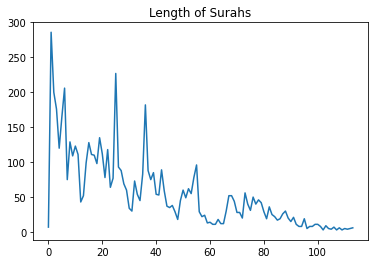

In [63]:
len_of_surahs = []
for i in surah:
    len_of_surahs.append(len(i))

plt.title("Length of Surahs")
plt.plot(len_of_surahs)

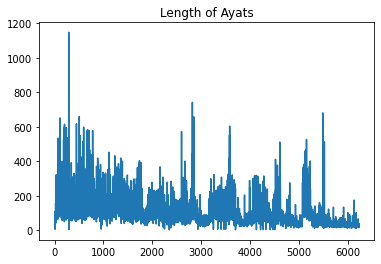

In [64]:
len_of_ayats = []
for i in surah:
    for j in i:
        len_of_ayats.append(len(j))
    
plt.title("Length of Ayats")
plt.plot(len_of_ayats)

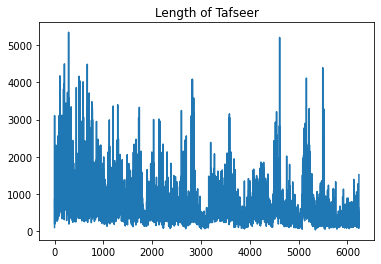

In [65]:
len_of_tafseers = []
for i in tafseer:
    for j in i:
        len_of_tafseers.append(len(j))
    
plt.title("Length of Tafseer")
plt.plot(len_of_tafseers)

# NLP

In [66]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alizahidraja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alizahidraja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alizahidraja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alizahidraja/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [67]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [71]:
lower_case_quran = quran_english.lower()
lower_case_tafseer = tafseer_all.lower()

In [72]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
        
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [73]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word_quran = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case_quran)]

clean_data_quran = ' '.join(lemmatized_word_quran)
len(clean_data_quran)

1440463

In [74]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word_tafseer = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case_tafseer)]

clean_data_tafseer = ' '.join(lemmatized_word_tafseer)
len(clean_data_tafseer)

2319495

In [75]:
df_clean_quran = pd.DataFrame([clean_data_quran])
df_clean_quran.columns = ['script']
df_clean_quran.index = ['quran']
df_clean_quran

,script
quran,praise allah alone sustainer world name god me...


In [76]:
df_clean_tafseer = pd.DataFrame([clean_data_tafseer])
df_clean_tafseer.columns = ['script']
df_clean_tafseer.index = ['tafseer']
df_clean_tafseer

,script
tafseer,name god compassionate merciful name allah ben...


In [77]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus_quran = df_clean_quran.script
vect_quran = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect_quran = vect_quran.fit_transform(corpus_quran)

In [78]:
corpus_tafseer = df_clean_tafseer.script
vect_tafseer = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect_tafseer = vect_tafseer.fit_transform(corpus_tafseer)

In [79]:
feature_names_quran = vect_quran.get_feature_names()
data_vect_feat_quran = pd.DataFrame(data_vect_quran.toarray(), columns=feature_names_quran)
data_vect_feat_quran.index = df_clean_quran.index
data_vect_feat_quran

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,aba,aback,abandon,abandoned,abandoning,abase,abased,abasement,abaser,...,zaqqum,zayd,zaynab,zeal,zealotry,zeyd,zihar,zuhr,zulaykha,zygote
quran,68,1,1,6,6,4,6,19,11,1,...,5,1,1,1,2,1,3,3,10,4


In [80]:
feature_names_tafseer = vect_tafseer.get_feature_names()
data_vect_feat_tafseer = pd.DataFrame(data_vect_tafseer.toarray(), columns=feature_names_tafseer)
data_vect_feat_tafseer.index = df_clean_tafseer.index
data_vect_feat_tafseer

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,ab,aba,aback,abadan,abandon,abandoned,abandoning,abase,abased,...,ūna,ūni,ūnī,ūq,ūrā,ūsikum,ūthūna,ḥaqāìiq,ṣlʿm,ṣuwar
tafseer,85,2,6,1,1,26,31,14,11,27,...,44,1,1,1,1,2,3,1,1,1


In [81]:
data_quran = data_vect_feat_quran.transpose()
data_quran.shape

(9677, 1)

In [82]:
data_tafseer = data_vect_feat_tafseer.transpose()
data_tafseer.shape

(15193, 1)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sn

top_dict_quran = {}
for c in data_quran.columns:
    top = data_quran[c].sort_values(ascending=False)
    top_dict_quran[c]= list(zip(top.index, top.values))
    
top_dict_quran['quran'][:10]

[('allah', 6126),
 ('god', 3206),
 ('lord', 3049),
 ('say', 2267),
 ('shall', 2259),
 ('said', 2236),
 ('unto', 2195),
 ('ye', 1862),
 ('people', 1746),
 ('day', 1635)]

In [84]:
top_dict_tafseer = {}
for c in data_tafseer.columns:
    top = data_tafseer[c].sort_values(ascending=False)
    top_dict_tafseer[c]= list(zip(top.index, top.values))
top_dict_tafseer['tafseer'][:10]

[('allah', 6727),
 ('god', 4894),
 ('said', 4507),
 ('say', 3399),
 ('lord', 2670),
 ('people', 2391),
 ('day', 2279),
 ('muhammad', 2108),
 ('unto', 1929),
 ('shall', 1767)]

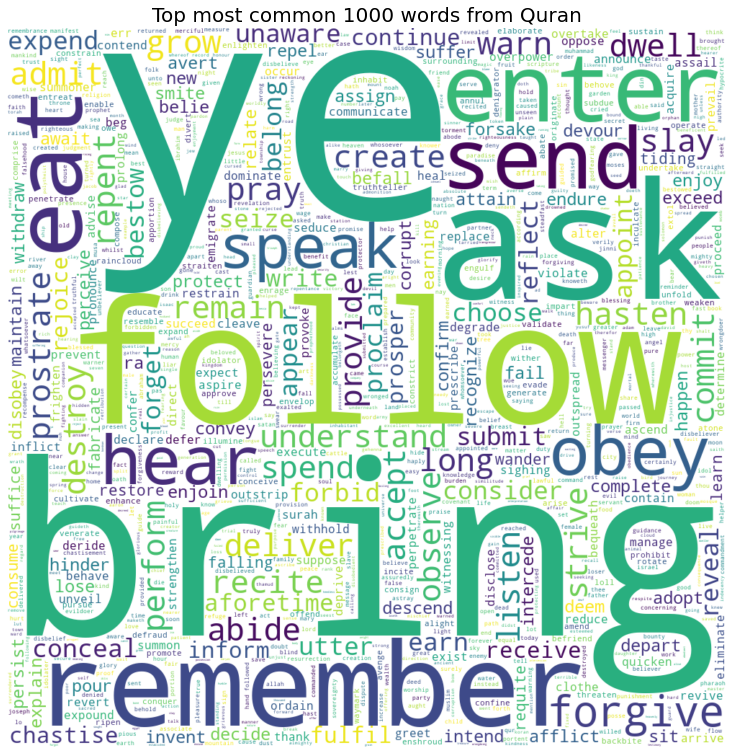

In [96]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk


word_count_dict = dict(top_dict_quran['quran'])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=1000,
                          width=1000,height=1000,
                         ).generate(" ".join(popular_words_nonstop))
plt.imshow(wordcloud, interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 1000 words from Quran",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('./images/topmost.png')

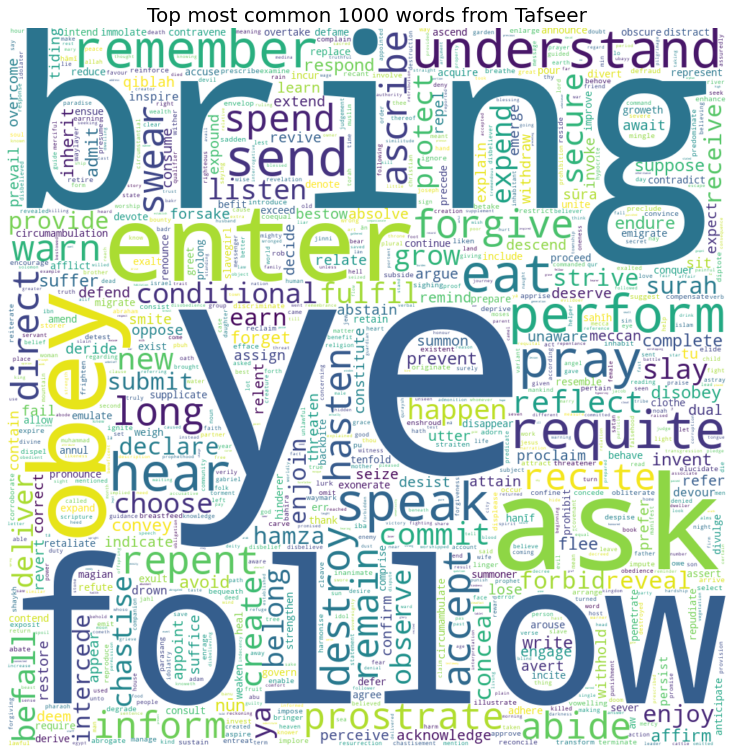

In [95]:
word_count_dict = dict(top_dict_tafseer['tafseer'])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=1000,
                          width=1000,height=1000,
                         ).generate(" ".join(popular_words_nonstop))
plt.imshow(wordcloud, interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 1000 words from Tafseer",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('./images/topmost_tafseer.png')

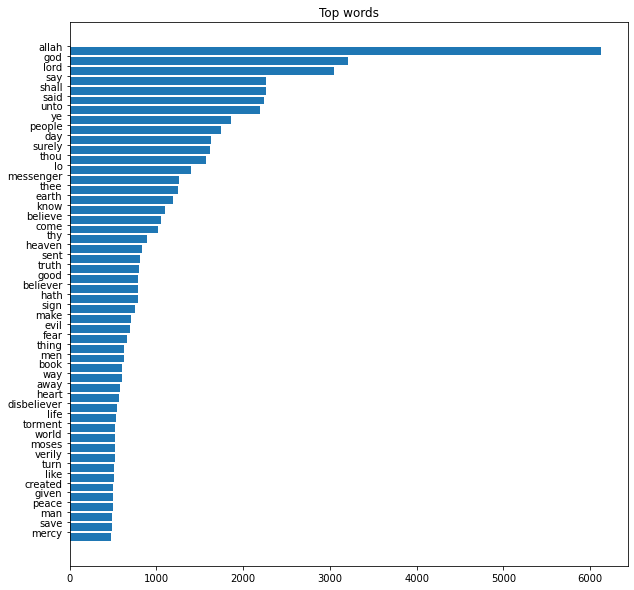

In [87]:
word_count_dict = dict(top_dict_quran['quran'][:50])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
plt.figure(figsize=(10,10))
plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
plt.title("Top words")
plt.show()

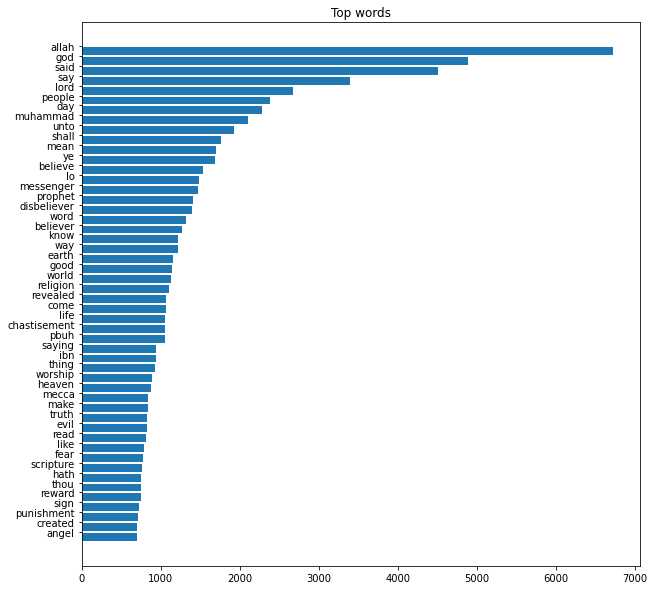

In [88]:
word_count_dict = dict(top_dict_tafseer['tafseer'][:50])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
plt.figure(figsize=(10,10))
plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
plt.title("Top words")
plt.show()

# Sentiment Analysis

In [89]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alizahidraja/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [90]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Islam is the best religion!")

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}

In [99]:
sia.polarity_scores(quran_english)

{'neg': 0.096, 'neu': 0.771, 'pos': 0.133, 'compound': 1.0}

In [92]:
sia.polarity_scores(tafseer_all)

{'neg': 0.09, 'neu': 0.791, 'pos': 0.12, 'compound': 1.0}

In [100]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    print(s_num, sia.polarity_scores(s))
    s_num+=1

1 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
4 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
6 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
7 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
8 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
9 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
11 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
12 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
13 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
14 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
15 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
16 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
17 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
18 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

In [101]:
s_num = 1
for ayats in tafseer:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    print(s_num, sia.polarity_scores(s))
    s_num+=1

1 {'neg': 0.025, 'neu': 0.801, 'pos': 0.174, 'compound': 0.9996}
2 {'neg': 0.092, 'neu': 0.794, 'pos': 0.113, 'compound': 1.0}
3 {'neg': 0.097, 'neu': 0.78, 'pos': 0.123, 'compound': 1.0}
4 {'neg': 0.101, 'neu': 0.772, 'pos': 0.127, 'compound': 1.0}
5 {'neg': 0.099, 'neu': 0.8, 'pos': 0.101, 'compound': -0.9992}
6 {'neg': 0.095, 'neu': 0.807, 'pos': 0.099, 'compound': 0.9224}
7 {'neg': 0.092, 'neu': 0.807, 'pos': 0.101, 'compound': 0.9996}
8 {'neg': 0.111, 'neu': 0.76, 'pos': 0.129, 'compound': 0.9986}
9 {'neg': 0.099, 'neu': 0.77, 'pos': 0.131, 'compound': 1.0}
10 {'neg': 0.092, 'neu': 0.784, 'pos': 0.124, 'compound': 0.9999}
11 {'neg': 0.11, 'neu': 0.77, 'pos': 0.121, 'compound': 0.9994}
12 {'neg': 0.073, 'neu': 0.825, 'pos': 0.102, 'compound': 0.9999}
13 {'neg': 0.074, 'neu': 0.805, 'pos': 0.121, 'compound': 0.9999}
14 {'neg': 0.1, 'neu': 0.774, 'pos': 0.126, 'compound': 0.9997}
15 {'neg': 0.085, 'neu': 0.811, 'pos': 0.104, 'compound': 0.9991}
16 {'neg': 0.089, 'neu': 0.787, 'pos': 

# TEXT SUMMARY

### Summary of Quran

In [102]:
import heapq

In [103]:
def summarise(text):
    sentence_list = nltk.sent_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    word_frequencies = {}
    for word in nltk.word_tokenize(text):
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

    sentence_scores = {}
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

In [104]:
summarise(quran_english)

';Which is it, of the favours of your Lord, that ye deny ? ;\nO believers! Lo! ;O ye who believe! ;\n(O Beloved!) Allah is Forgiving, Merciful. ;O which of your Lord’s bounties will you and you deny?'

### Summary of Surahs

In [105]:
s_num = 1
for ayats in surah_english:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    summary = summarise(s)
    if len(summary) < 5:
        print("SURAH NUMBER:",s_num, "SURAH:", s)
    else:
        print("SURAH NUMBER:",s_num, "SUMMARY:", summary)
    print()
    s_num+=1

SURAH NUMBER: 1 SUMMARY: ;
Most Compassionate, Ever-Merciful,;Praise belongs to God, the Lord of all Being,;Praise be to Allah, Lord of the Worlds,;
Master of the Day of Judgment. All praise be to Allah alone, the Sustainer of all the worlds,;In the Name of God, the Merciful, the Compassionate;In the name of Allah, the Beneficent, the Merciful. ;Owner of the Day of Judgment,;
Show us the straight path,;Thee only we serve; to Thee alone we pray for succour. ;the All-merciful, the All-compassionate,;The Beneficent, the Merciful. ;the path of those whom Thou hast blessed, not of those against whom Thou art wrathful, nor of those who are astray. ;The path of those whom Thou hast favoured; Not the (path) of those who earn Thine anger nor of those who go astray. ;
(O Allah!)

SURAH NUMBER: 2 SUMMARY: Allah is Forgiving, Merciful. ;
(O Beloved!) And when they make a promise, they fulfil it and are steadfast in hardship (i.e., poverty) and suffering (i.e., ailment) and at the time of fierce fi

SURAH NUMBER: 13 SUMMARY: ;
He is the One Who, to rouse in you (sometimes) fear and (some other times) hope, shows you lightning, and (at times) raises (rain-laden) heavy clouds. And, (O listener,) if you follow the desires of these (disbelievers) after the (conclusive) knowledge has reached you, then there is no helper or protector for you against Allah. ;
And whoever is in the heavens and the earth prostrates himself before Allah, (some) willingly and (others) perforce, and their shadows (too prostrate themselves before Him) morning and evening. ;
And, (O Messenger,) indeed We sent before you (many) Messengers and brought up for them wives and children (as well). ;the Knower of the unseen and the visible, the All-great, the All-exalted:;He is the Knower of the Invisible and the Visible, the Great, the High Exalted. Then, as for the foam, it passeth away as scum upon the banks, while, as for that which is of use to mankind, it remaineth in the earth. ;
And those whom We have given the

SURAH NUMBER: 24 SUMMARY: And after this, whoever adopts ingratitude (i.e., aversion to, and denial of, My commands) it is they who will be defiant (and disobedient). And, (likewise,) clean and chaste women are (specific) to clean and pious men, whilst clean and pious men are exclusively for clean and chaste women. These (pure, innocent and pious people) are totally free from these (slanders), which these (foul-mouthed) people are levelling. ;
There is no sin on you if you enter (without permission) those houses (or buildings) which are not permanent residences (such as hotels, road-houses and inns). ;
(This Light of Allah illumines) such houses (mosques and centres) as Allah has ordained to exalt (i.e., enhance their esteem and honour) and remember His Name therein. And turn to Allah, all of you, in repentance, O believers, so that you may prosper (by implementing these commandments). ;
And they say: ‘We have believed in Allah and the Messenger and we obey.’ Then, after (saying) this,

SURAH NUMBER: 34 SUMMARY: ;and they say, ’We believe in it’; but how can they reach from a place far away,;And say: We (now) believe therein. ;But they said, ’Our Lord, prolong the stages of our travel’; and they wronged themselves, so We made them as but tales, and We tore them utterly to pieces. And We made the iron supple unto him,;
(And We commanded:) ‘Make wide and full-length coats of mail and care for the measure while joining (their) links (i.e., rings). ;
Say: ‘The truth has come, and falsehood can neither originate (anything), nor can it regenerate.’;Say. Thou art our Protector, apart from them; nay rather, they were serving the jinn; most of them believed in them.’;They will say: Be Thou Glorified. ’Truth has come; falsehood originates not, nor brings again.’;Say: The Truth hath come, and falsehood showeth not its face and will not return. ;
And when We decreed Sulayman’s (Solomon’s) death, nothing made them (the jinn) aware of his death except a termite of the earth which k

SURAH NUMBER: 44 SUMMARY: ;
Amid gardens and springs,;among gardens and fountains,;Amid gardens and watersprings,;
Dressed in fine silk and heavy brocade, facing one another. ;
It will boil in the bellies like molten copper,;like molten copper, bubbling in the belly;Like molten brass, it seetheth in their bellies;
Like the seething of simmering water. ;and We chose them, out of a knowledge, above all beings,;And We chose them, purposely, above (all) creatures. Surely, we believe.’;’O our Lord, remove Thou from us the chastisement; we are believers.’;(Then they will say): Our Lord relieve us of the torment. Verily, He is All-Hearing, All-Knowing,;as a mercy from thy Lord (surely He is the All-hearing, the All-knowing);A mercy from thy Lord. ;and, ’Rise not up against God; behold, I come to you with a clear authority,;And saying: Be not proud against Allah. ;from Pharaoh; surely he was a high One, of the prodigals;;(We delivered them) from Pharaoh.

SURAH NUMBER: 45 SUMMARY: ;They say, ’

SURAH NUMBER: 53 SUMMARY: ;and Thamood, and He did not spare them,;And (the tribe of) Thamud He spared not;;
And before that, He destroyed the people of Nuh ([Noah] as well). ;your comrade is not astray, neither errs,;Your comrade erreth not, nor is deceived;;
And he does not speak out of his (own) desire. ;Have you considered El-Lat and El-’Uzza;Have ye thought upon Al-Lat and Al-’Uzza;
And (have you) also (seen thoughtfully) another, that third one (goddess) Manat? ;and the Subverted City He also overthrew,;And Al-Mu’tafikah He destroyed;
Then covered them that which did cover (i.e., the stones were rained on them). ;
When theophanies (i.e., effulgent disclosures) of the divine light wrapped up al-Sidra (the Lote-Tree at the Far End), covering it expansively. ;His heart lies not of what he saw;;The heart lied not (in seeing) what it saw. they were more unjust and more rebellious;;
And He is the One Who (raised up) the overturned towns (of the people of Lut [Lot]) and smashed them dow

SURAH NUMBER: 65 SUMMARY: When ye (men) put away women, put them away for their (legal) period and reckon the period, and keep your duty to Allah, your Lord. ;And for such of your women as despair of menstruation, if ye doubt, their period (of waiting) shall be three months, along with those who have it not. Believers, God has sent down to you, for a remembrance,;Allah hath prepared for them stern punishment; so keep your duty to Allah, O men of understanding! ;Lodge them where you are lodging, according to your means, and do not press them, so as to straiten their circumstances. ;
And those of your women who have no hope of menstruation, if you doubt (as to what will be their prescribed period), then their prescribed period is three months. ;As for your women who have despaired of further menstruating, if you are in doubt, their period shall be three months; and those who have not menstruated as yet. Whoso fears God, God will appoint for him, of His command, easiness.

SURAH NUMBER: 6

SURAH NUMBER: 83 SUMMARY: ;
Indeed, the truly pious, (joyful and glad,) will be in blissful Paradise,;Surely the pious shall be in bliss,;Lo! ;
Surely (in the worldly life), the evildoers used to ridicule the believers,;Behold, the sinners were laughing at the believers,;Lo! ;Woe to the stinters who,;Woe unto the defrauders:;
When (they) take by measure from others, they take (from them) full. ;No indeed; the book of the pious is in Illiyun;;Nay, but the record of the righteous is in ’Illiyin -;
And what do you know what ‘Illiyyin is? ;When our signs are recited to him, he says, ’Fairy-tales of the ancients!’;Who, when thou readest unto him Our revelations, saith: (Mere) fables of the men of old. ;No indeed; the Book of the libertines is in Sijjin;;Nay, but the record of the vile is in Sijjin -;
And what do you know what Sijjin is? ;upon couches gazing;;On couches, gazing,;
You will find on their faces the glow and freshness of bliss and delight.

SURAH NUMBER: 84 SUMMARY: ;Nay, but th

### Summary of Tafaseer

In [106]:
s_num = 1
for ayats in tafseer:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    summary = summarise(s)
    if len(summary) < 5:
        print("SURAH NUMBER:",s_num, "TAFSEER:", s)
    else:
        print("SURAH NUMBER:",s_num, "TAFSEER SUMMARY:", summary)
    print()
    s_num+=1

SURAH NUMBER: 1 TAFSEER SUMMARY: It is also said: laudation, absolute unity and godhood all belong to Allah Who has neither progeny, partner, helper nor an assistant. It is also said that (Lord of the worlds) means the Creator of all created beings, their Provider and the One Who changes them from one state into another. This is substituted by;(Guide us to the straight path) guide us to the established Religion that You are pleased with, i.e. ;(Owner of the Day of Judgement) the Arbitrator on the Day of Judgement which is the Day of Reckoning and settlement of disputes between created beings, i.e. It is also said that (the path of those whom Thou hast favoured) refers to the prophets. In the Name of God the Compassionate the Merciful;In the name of Allah, the Beneficent, the Merciful. (Nor of those who go astray), nor the religion of the Christians who erred from Islam.

SURAH NUMBER: 2 TAFSEER SUMMARY: (Lo! ;(He) the devil (enjoineth upon you only the evil) evil works (and the foul) t

SURAH NUMBER: 12 TAFSEER SUMMARY: (Lo! the (human) soul) the heart (enjoineth) the body (unto evil) evil works, (save that whereon my Lord hath mercy) save those whom Allah protects. ;(He said) Jacob said to them: (Can I entrust him) Benjamin (to you save as I entrusted his brother) Joseph (to you aforetime?) ;(Verily in Joseph) in the narrative of Joseph (and his brethren are signs (of Allah's Sovereignty)) lessons (for the inquiring) about his story. ;(And when they came (again) before him (Joseph)) a third time (they said: O ruler! ;(They said) Joseph's servant said: (And what shall be the penalty for it) what would be the penalty of the thief (if ye prove liars?) ;(And though thou try much) no matter how hard you try, (most men) the people of Mecca (will not believe) in the scriptures and messengers.

SURAH NUMBER: 13 TAFSEER SUMMARY: the people of Mecca (how We visit the land) how We seize the land, (reducing it of) opening it up to Muhammad (pbuh) from (its outlying parts?) (Say)

SURAH NUMBER: 22 TAFSEER SUMMARY: (Lo! (He hath named you) Allah named you (Muslims of old time) before this Qur'an, in the Scriptures of past prophets (and in this (Scripture)) i.e. Gabriel, Michael, Seraphiel and the angel of death, (and (also) from mankind) Muhammad and all the prophets (pbut). ;(He calleth) the Banu'l-Hallaf worship others (beside Allah, unto that which hurts him not) if they do not worship them (nor benefits him) if they worshipped them. (I am) from Allah (only a plain) addressing you in a language you know (warner unto you) a warning Messenger. ;(And how many a township) and how many a population of township (did I suffer long) I gave a reprieve from chastisement (though it was sinful!) (A similitude is coined) He has explained the likeness of your deities, (so pay ye heed to it) and respond: (Lo!

SURAH NUMBER: 23 TAFSEER SUMMARY: ;(Say) O Muhammad: (Unto Whom (belongeth) the earth and whosoever is therein) of created beings; answer me, (if ye have knowledge?) ;

SURAH NUMBER: 33 TAFSEER SUMMARY: (Lo! (And when ye ask of them (the wives of the Prophet) anything) and when you speak with them, (ask it of them) speak with them (from behind a curtain. Muhammad (pbuh) (Say unto thy wives: If ye desire the world's life) what is in the life of this world (and its adornment) and its splendour, (come! (Be regular in prayer) perform the five daily prayers, (and pay the poor-due) from your wealth, (and obey Allah and His messenger) in that which is customary. (There is no stand (possible) for you) there is no place for you in the Ditch to fight, (therefore turn back) to Medina. ;(Men) the people of Mecca (ask you) O Muhammad (of the Hour) about the coming of the Last Hour. (But if ye are invited, enter, and, when, your meal is ended) when you have finished eating, (then disperse) then leave.

SURAH NUMBER: 34 TAFSEER SUMMARY: Herein) in what We have done to them (verily are portents) signs and lessons (for each steadfast) in obedience, (grateful (heart)) 

SURAH NUMBER: 46 TAFSEER SUMMARY: ;(Say) O Muhammad to the people of Mecca: (Have ye thought on) inform me about (all that ye invoke) worship (beside Allah) of idols? the disbeliever, (pray unto) worship (such as hear not their prayer) such as respond not to his supplication (until the Day of Resurrection) i.e. (But those who disbelieve) the disbelievers of Mecca (turn away from that whereof they are warned) disbelieve in Muhammad (pbuh) and the Qur'an. (And they twain) his parents (cry unto Allah for help (and say): Woe unto thee) may Allah straiten your livelihood! ;(He said) Hud said to them: (The knowledge) of when the torment shall come (is with Allah only. (Then bring upon us that) torment (wherewith thou threatenest us, if thou art of the Truthful) that torment will befall us if we reject faith. ;(And make mention) O Muhammad to the disbelievers of Mecca (of the brother of 'Aad) the Prophet of the Banu 'Aad, i.e.

SURAH NUMBER: 47 TAFSEER SUMMARY: ;(And how many a township) how 

SURAH NUMBER: 58 TAFSEER SUMMARY: When it is said) when the Prophet (pbuh) says: (Make room in assemblies, then make room; Allah will make way for you (Hereafter)) in the Hereafter. (Such) the hypocrites and the Jews (are rightful owners of the Fire) the inhabitants of the Fire; (they will abide therein) for eternity, neither to die nor leave it. (Lo! those who oppose) contravene (Allah and His messenger) in the matter of religion, (they will be among the lowest) in the Fire. (When ye hold conference) when you speak (with the messenger, offer an alms before your conference). ;(Allah hath prepared for them) for the hypocrites: 'Abdullah Ibn Ubayy and his host (a dreadful doom) in the life of the world and in the Hereafter. the hypocrites (are neither of you) in private such that what is due to you is due to them (nor of them) i.e.

SURAH NUMBER: 59 TAFSEER SUMMARY: Banu'l-Nadir (would go forth) from Medina to Historic Syria, (while they) the Banu'l-Nadir (deemed that their strongholds) 

SURAH NUMBER: 69 TAFSEER SUMMARY: ;((The tribes of) Thamud) the people of Salih (and 'Aad) the people of Hud (disbelieved in the judgement to come) in the coming of the Hour. ;(And lo! the Qur'an (is a warrant) a reminder (unto those who ward off (evil)) disbelief, idolatry and indecencies. ;(It is a revelation) He says: the Qur'an is a revelation to Muhammad (pbuh) (from the Lord of the Worlds. ;(And not one of you could have held Us off from him) He says: no one of you could have held Us back from Muhammad (pbuh). ;(And they disobeyed the messenger of their Lord) Moses, (therefore did He grip them with a tightening grip) therefore He punished them with a severe punishment. It) i.e.

SURAH NUMBER: 70 TAFSEER SUMMARY: ;(These) those who have such traits (will dwell in Gardens, honoured) with reward, presents and gifts. ;(But be patient) O Muhammad, in the face of their harm (with a patience fair to see) i.e. ;(To replace them by (others) better than them) He says: We are Able to destro

SURAH NUMBER: 81 TAFSEER SUMMARY: Muhammad (pbuh) (avid of the Unseen) he is accused with regard to the revelation; and it is also said this means: he is not avaricious. ;(And your comrade) your Prophet Muhammad, O Quraysh (is not mad) bewitched as you claim. ;((One) to be obeyed) i.e. ;(Whither then go ye) from Allah's chastisement, commands and prohibitions, O disbelievers? the Qur'an (is in truth the word of an honoured messenger) Allah says: it is brought down by Gabriel to a messenger who is honoured by Allah, i.e. It is only a reminder an admonition for all worlds those of mankind and jinn;(This is) i.e. ;(And he is not) i.e.

SURAH NUMBER: 82 TAFSEER SUMMARY: Rather you that is disbelievers of Mecca deny Judgement requital for deeds;;(Nay) truly, (but they) the Quraysh (deny the Judgement) and the Reckoning. ;(Ah, what will convey unto thee) O Muhammad (what the Day of Judgement is!) ;(Who know (all) that ye do) and say of good and evil and record all of it. the righteous) who a

# Search Engine 

In [107]:
import tensorflow as tf
import tensorflow_hub as hub
from tqdm import tqdm
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
import collections

In [108]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alizahidraja/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [110]:
df['useful_info'] = df.Translation1.astype(str) + df.Translation2.astype(str) + df.Translation3.astype(str) + \
                df.Tafaseer1.astype(str) + df.Tafaseer1.astype(str)
df["useful_info"] = df.useful_info.replace(to_replace='[!"#$%&\'()*+,/:;<=>?@[\\]^_`{|}~]',value=' ',regex=True) 
#remove punctuation
df.useful_info =df.useful_info.replace(to_replace='-',value=' ',regex=True)
df.useful_info =df.useful_info.replace(to_replace='\s+',value=' ',regex=True)    #remove new line
df.useful_info =df.useful_info.replace(to_replace='  ',value='',regex=True)   #remove double white space  
df.useful_info =df.useful_info.replace(to_replace="'",value='',regex=True)   


df.useful_info = df.useful_info.apply(lambda x:x.strip().lower())  # Ltrim and Rtrim of whitespace

In [111]:
df["info_tokenize"]= [word_tokenize(entry) for entry in tqdm(df["useful_info"])] 

100%|███████████████████████| 6236/6236 [00:02<00:00, 2440.84it/s]


In [112]:
def wordLemmatizer(data):
    tag_map = collections.defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    clean_k =pd.DataFrame()
    word_Lemmatized = WordNetLemmatizer()
    for index,entry in tqdm(enumerate(data)):
        
        Final_words = []
        for word, tag in pos_tag(entry):
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
        
        clean_k.loc[index,'Keyword_final'] = str(Final_words)
    clean_k=clean_k.replace(to_replace ="'", value = '', regex = True)
    clean_k=clean_k.replace(to_replace =" ", value = '', regex = True)
    clean_k=clean_k.replace(to_replace ="\[", value = '', regex = True)
    clean_k=clean_k.replace(to_replace ='\]', value = '', regex = True)
    return clean_k

In [113]:
df["Keyword_final"] = wordLemmatizer(df['info_tokenize'])
df.head()

6236it [01:24, 74.08it/s] 


,Name,Surah,Ayat,Arabic,Translation1,Translation2,Translation3,Tafaseer1,Tafaseer2,useful_info,info_tokenize,Keyword_final
0,The Opening,1,1,بِسمِ ٱلله الرَّحْمٰنِ الرَّحِيـمِ,"All praise be to Allah alone, the Sustainer of...","In the Name of God, the Merciful, the Compassi...","In the name of Allah, the Beneficent, the Merc...",In the Name of God the Compassionate the Merciful,"In the name of Allah, the Beneficent, the Merc...",all praise be to allah alone the sustainer of ...,"[all, praise, be, to, allah, alone, the, susta...","praise,allah,alone,sustainer,world,name,god,me..."
1,The Opening,1,2,ٱلْحَمْدُ للَّهِ رَبِّ ٱلْعَالَمِينَ,"Most Compassionate, Ever-Merciful,","Praise belongs to God, the Lord of all Being,","Praise be to Allah, Lord of the Worlds,",In the Name of God the name of a thing is that...,And on his authority it is related that Ibn 'A...,most compassionate ever merciful praise belong...,"[most, compassionate, ever, merciful, praise, ...","compassionate,ever,merciful,praise,belongs,god..."
2,The Opening,1,3,ٱلرَّحْمـٰنِ ٱلرَّحِيمِ,Master of the Day of Judgment.,"the All-merciful, the All-compassionate,","The Beneficent, the Merciful.",The Compassionate the Merciful that is to say ...,(The Beneficent) the Gentle. (The Merciful) th...,master of the day of judgment.the all merciful...,"[master, of, the, day, of, judgment.the, all, ...","master,day,merciful,compassionate,beneficent,c..."
3,The Opening,1,4,مَـٰلِكِ يَوْمِ ٱلدِّينِ,(O Allah!) You alone do we worship and to You ...,the Master of the Day of Doom.,"Owner of the Day of Judgment,",Master of the Day of Judgement that is the day...,(Owner of the Day of Judgement) the Arbitrator...,o allah you alone do we worship and to you alo...,"[o, allah, you, alone, do, we, worship, and, t...","allah,alone,worship,alone,look,master,day,day,..."
4,The Opening,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Show us the straight path,",Thee only we serve; to Thee alone we pray for ...,Thee (alone) we worship; Thee (alone) we ask f...,You alone we worship and You alone we ask for ...,"(Thee (alone) we worship), we turn to you as t...",show us the straight path thee only we serve t...,"[show, us, the, straight, path, thee, only, we...","show,u,straight,path,thee,serve,thee,alone,pra..."


In [114]:
#Using Google Universal Sentence Encoder
#USEmodel = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
### NEED TO DOWNLOAD THE MODEL
USEmodel = hub.load("model/")

2022-11-28 13:53:40.409803: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [115]:
train = USEmodel(df.Keyword_final)
train_m = tf.train.Checkpoint(v=tf.Variable(train))

train_m.f = tf.function( lambda  x: exported_m.v * x, input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])

model = train_m.v.numpy()

In [116]:
model.shape

(6236, 512)

In [117]:
def SearchDocument(query,size=10):
    q = [query]
    Q_Train = USEmodel(q)
    
    linear_similarities = linear_kernel(Q_Train, model).flatten() 
    
    Top_index_doc = linear_similarities.argsort()[:-(size+1):-1]
    #print(Top_index_doc)
    linear_similarities.sort()
    find = pd.DataFrame()
    for i,index in enumerate(Top_index_doc):
        find.loc[i,'Name'] = str(df['Name'][index])
        find.loc[i,'Surah'] = str(df['Surah'][index])
        find.loc[i,'Ayat'] = str(df['Ayat'][index])
        find.loc[i,'Arabic'] = df['Arabic'][index]
        find.loc[i,'Translation1'] = df['Translation1'][index] 
        find.loc[i,'Translation2'] = df['Translation2'][index] 
        find.loc[i,'Translation3'] = df['Translation3'][index] 
        find.loc[i,'Tafaseer1'] = df['Tafaseer1'][index]
        find.loc[i,'Tafaseer2'] = df['Tafaseer2'][index]
        
        
    for j,simScore in enumerate(linear_similarities[:-(size+1):-1]):
        find.loc[j,'Score'] = simScore
        
    if size==1:
        print("Query: ",query,".  Surah:", find.loc[0,'Name'], " Number:", find.loc[0,'Surah'], 
              " Ayat:", find.loc[0,'Ayat']," Tafseer: ", find.loc[0,'Tafseer'], "\n")
    else:
        return find

In [118]:
SearchDocument("Happiness")

,Name,Surah,Ayat,Arabic,Translation1,Translation2,Translation3,Tafaseer1,Tafaseer2,Score
0,Hûd,11,22,لاَ جَرَمَ أَنَّهُمْ فِي ٱلآخِرَةِ هُمُ ٱلأَخْ...,This is absolutely true that it is certainly t...,they without doubt will be the greatest losers...,Assuredly in the Hereafter they will be the gr...,Without doubt verily they will be the greatest...,(Assuredly in the Hereafter they will be the g...,0.496507
1,The Cave,18,20,إِنَّهُمْ إِن يَظْهَرُواْ عَلَيْكُمْ يَرْجُمُو...,"Surely, if they overpower you (after becoming ...",If they should get knowledge of you they will ...,"For they, if they should come to know of you, ...",For indeed if they should come to know of you ...,"(For they, if they) the Magians (should come t...",0.450986
2,The Tidings,78,5,ثُمَّ كَلاَّ سَيَعْلَمُونَ,(We) once more (assert: Dissent and denial are...,"Again, no indeed; they shall soon know!","Nay, again, but they will come to know!",Again no indeed! They will come to know! reite...,"(Nay) truly, (again, but they will come to kno...",0.426870
3,Mary,19,56,وَٱذْكُرْ فِي ٱلْكِتَابِ إِدْرِيسَ إِنَّهُ كَا...,And mention in the Book the account of Idris. ...,And mention in the Book Idris; he was a true m...,And make mention in the Scripture of Idris. Lo...,And mention in the Book Idrīs who was Noah’s g...,(And make mention in the Scripture of Idris) o...,0.411820
4,The Heights,7,108,وَنَزَعَ يَدَهُ فَإِذَا هِيَ بَيْضَآءُ لِلنَّا...,And he drew out his hand (after putting it int...,"And he drew forth his hand, and lo, it was whi...","And he drew forth his hand (from his bosom), a...",And he drew forth his hand he took it out from...,(And he drew forth his hand) from his armpit: ...,0.405972
5,Those Who Set The Ranks,37,6,إِنَّا زَيَّنَّا ٱلسَّمَآءَ ٱلدُّنْيَا بِزِينَ...,"Surely, We have adorned the world’s heaven (th...",We have adorned the lower heaven with the ador...,Lo! We have adorned the lowest heaven with an ...,We have indeed adorned the lowest heaven with ...,(Lo! We have adorned the lowest heaven) the fi...,0.399808
6,The Heights,7,45,ٱلَّذِينَ يَصُدُّونَ عَن سَبِيلِ ٱللَّهِ وَيَب...,(It is they) who used to hinder (the people) f...,"who bar from God’s way, desiring to make it cr...",Who debar (men) from the path of Allah and wou...,who bar people from God’s way from His religio...,(Who debar (men) from the path of Allah) who d...,0.399233
7,Banning,66,7,يٰأَيُّهَا ٱلَّذِينَ كَفَرُواْ لاَ تَعْتَذِرُو...,O disbelievers! Do not make any excuse Today. ...,"’O you unbelievers, do not excuse yourselves t...",(Then it will be said): O ye who disbelieve! M...,‘O you who disbelieve! Do not make any excuses...,(Then it will be said): O ye who disbelieve) i...,0.399162
8,The Reality,69,35,فَلَيْسَ لَهُ ٱلْيَوْمَ هَا هُنَا حَمِيمٌ,So Today he does not have any warm friend.,"therefore he today has not here one loyal friend,","Therefor hath he no lover here this day,",therefore here today he has no loyal friend no...,(Therefore hath he no lover here this day) thi...,0.395888
9,The Cow,2,160,إِلاَّ ٱلَّذِينَ تَابُواْ وَأَصْلَحُواْ وَبَيّ...,"But those who repent, mend (their) ways and ma...","save such as repent and make amends, and show ...",Except those who repent and amend and make man...,Except those that repent turning back from suc...,(Except such of them as repent) from Judaism (...,0.384309


In [119]:
SearchDocument("What reward do I get?")

,Name,Surah,Ayat,Arabic,Translation1,Translation2,Translation3,Tafaseer1,Tafaseer2,Score
0,The Poets,26,206,ثُمَّ جَآءَهُم مَّا كَانُواْ يُوعَدُونَ,Then comes to them that (torment) which they a...,"then there comes on them that they were promised,","And then cometh that which they were promised,",then there were to come on them that which the...,(And then cometh that which they were promised...,0.228404
1,The Poets,26,124,إِذْ قَالَ لَهُمْ أَخُوهُمْ هُودٌ أَلاَ تَتَّق...,When their (kinship) brother Hud said to them:...,"when their brother Hood said to them, ’Will yo...",When their brother Hud said unto them: Will ye...,when Hūd their brother said to them ‘Will you ...,(When their brother) their Prophet (Hud said u...,0.222718
2,The Children of Israel,17,83,وَإِذَآ أَنْعَمْنَا عَلَى ٱلإنْسَانِ أَعْرَضَ ...,"And when We bestow upon man (some) blessing, h...","And when We bless man, he turns away, and with...","And when We make life pleasant unto man, he tu...",And when We are gracious to man the disbelievi...,(And when We make life pleasant unto man) i.e....,0.214738
3,Cattle,6,58,قُل لَّوْ أَنَّ عِندِي مَا تَسْتَعْجِلُونَ بِه...,Say (to them): ‘Had I had that (torment) which...,"Say: ’If what you seek to hasten were with me,...","Say: If I had that for which ye are impatient,...",Say to them ‘If I did have what you seek to ha...,(Say) O Muhammad: (If I had that for which ye ...,0.199927
4,The Heights,7,41,لَهُمْ مِّن جَهَنَّمَ مِهَادٌ وَمِن فَوْقِهِمْ...,The (Fire of) Hell will be their mattress as w...,"Gehenna shall be their cradle, above them cove...","Theirs will be a bed of hell, and over them co...",Hell shall be their bed and over them covering...,"(Theirs will be a bed of hell) a bed of fire, ...",0.198991
5,The Family of 'Imrân,3,15,قُلْ أَؤُنَبِّئُكُمْ بِخَيْرٍ مِّن ذٰلِكُمْ لِ...,(O Beloved!) Say: ‘Shall I give you the news o...,Say: ’Shall I tell you of a better than that?’...,Say: Shall I inform you of something better th...,Say O Muhammad (s) to your people ‘Shall I tel...,Then Allah elucidated the bliss of the Hereaft...,0.197288
6,The Beneficent,55,4,عَلَّمَهُ ٱلبَيَانَ,He alone taught him the art of expression and ...,and He has taught him the Explanation.,He hath taught him utterance.,teaching him the coherent speech utterance.,(He hath taught him utterance) Allah inspired ...,0.186016
7,The Criterion,25,66,إِنَّهَا سَآءَتْ مُسْتَقَرّاً وَمُقَاماً,"Surely, that is an evil lodging (for temporary...",evil it is as a lodging-place and an abode’;,Lo! it is wretched as abode and station;,It is truly a wretched abode and residence!’ i...,(Lo! it is wretched as abode and station) dwel...,0.182393
8,The Cow,2,280,وَإِن كَانَ ذُو عُسْرَةٍ فَنَظِرَةٌ إِلَىٰ مَي...,"And if a debtor is under financial stress, he ...","And if any man should be in difficulties, let ...",And if the debtor is in straitened circumstanc...,And if any man in debt should be in difficulti...,(And if the debtor) the Banu Makhzum (is in st...,0.181042
9,Defrauding,83,3,وَإِذَا كَالُوهُمْ أَوْ وَّزَنُوهُمْ يُخْسِرُونَ,And when they (themselves) give by measure or ...,"but, when they measure for them or weigh for t...",But if they measure unto them or weight for th...,but who when they measure for them or weigh fo...,(But if they measure unto them) but when they ...,0.180865


In [120]:
SearchDocument("What is the punishment for sin?")

,Name,Surah,Ayat,Arabic,Translation1,Translation2,Translation3,Tafaseer1,Tafaseer2,Score
0,Spoils of War,8,72,إِنَّ ٱلَّذِينَ آمَنُواْ وَهَاجَرُواْ وَجَاهَد...,"Indeed, those who have embraced faith and have...","Those who believe, and have emigrated and stru...",Lo! those who believed and left their homes an...,Truly those who believed and emigrated and str...,(Lo! those who believed) in Muhammad and in th...,0.333019
1,The Private Apartments,49,1,يٰأَيُّهَا ٱلَّذِينَ آمَنُواْ لاَ تُقَدِّمُواْ...,O believers! Do not step ahead of Allah and Hi...,"O believers, advance not before God and His Me...",O ye who believe! Be not forward in the presen...,O you who believe do not venture ahead of tuqa...,And from his narration on the authority of Ibn...,0.332297
2,Yâ Sîn,36,82,إِنَّمَآ أَمْرُهُ إِذَآ أَرَادَ شَيْئاً أَن يَ...,His command (of creation) is only that when He...,"His command, when He desires a thing, is to sa...","But His command, when He intendeth a thing, is...",His command His affair when He wills a thing t...,"(But His command) regarding the resurrection, ...",0.310262
3,The Heights,7,54,إِنَّ رَبَّكُمُ ٱللَّهُ ٱلَّذِي خَلَقَ ٱلسَمَٰ...,"Indeed, Allah is your Lord, Who created the he...","Surely your Lord is God, who created the heave...",Lo! your Lord is Allah Who created the heavens...,Surely your Lord is God Who created the heaven...,(Lo! your Lord is Allah Who created the heaven...,0.167575
4,Ornaments of Gold,43,2,وَٱلْكِتَابِ ٱلْمُبِينِ,"By the illumined Book,","By the Clear Book,","By the Scripture which maketh plain,",By the Book the Qur’ān that clarifies the one ...,(By the Scripture which maketh plain) he says:...,0.166730
5,Tâ Hâ,20,28,يَفْقَهُواْ قَوْلِي,That people may understand (easily) what I say.,hat they may understand my words.,That they may understand my saying.,so that they may understand what I shall say w...,(That they may understand my saying) that they...,0.165980
6,The Jinn,72,1,قُلْ أُوحِيَ إِلَيَّ أَنَّهُ ٱسْتَمَعَ نَفَرٌ ...,Say: ‘It has been revealed to me that a party ...,Say: ’It has been revealed to me that a compan...,Say (O Muhammad): It is revealed unto me that ...,Say O Muhammad (s) to people ‘It has been reve...,And from his narration on the authority of Ibn...,0.163032
7,The Winnowing Winds,51,52,كَذَلِكَ مَآ أَتَى ٱلَّذِينَ مِن قَبْلِهِمْ مّ...,"Likewise, no Messenger came to those before th...",Even so not a Messenger came to those before t...,Even so there came no messenger unto those bef...,Thus there did not come to those who were befo...,(Even so) just as your own people accused you ...,0.158962
8,The Cave,18,52,وَيَوْمَ يَقُولُ نَادُواْ شُرَكَآئِيَ ٱلَّذِين...,And (remember) the Day (when) Allah will say: ...,"And on the day He shall say, ’Call on My assoc...",And (be mindful of) the Day when He will say: ...,And the day yawma is in the accusative because...,(And (be mindful of) the Day) which is the Day...,0.157568
9,The Winnowing Winds,51,35,فَأَخْرَجْنَا مَن كَانَ فِيهَا مِنَ ٱلْمُؤْمِن...,Then We moved everyone who was of the believer...,"So We brought forth such believers as were in it,",Then we brought forth such believers as were t...,So We brought forth those in them that is in t...,(You We brought forth) from the townships of L...,0.157147


In [123]:
SearchDocument(df.iloc[0]["Tafaseer1"])

,Name,Surah,Ayat,Arabic,Translation1,Translation2,Translation3,Tafaseer1,Tafaseer2,Score
0,Ornaments of Gold,43,60,وَلَوْ نَشَآءُ لَجَعَلْنَا مِنكُمْ مَّلاَئِكَة...,"And had We so willed, We would have made angel...","Had We willed, We would have appointed angels ...",And had We willed We could have set among you ...,And had We willed We would have appointed amon...,(And had We willed We could have set among you...,0.255854
1,The Ascending Stairways,70,27,وَٱلَّذِينَ هُم مِّنْ عَذَابِ رَبِّهِم مُّشْفِ...,And those who fear the torment of their Lord;,and go in fear of the chastisement of their Lord,And those who are fearful of their Lord’s doom -,and who are apprehensive of the chastisement o...,(And those who are fearful of their Lord's doom,0.223619
2,The Heights,7,50,وَنَادَىٰ أَصْحَابُ ٱلنَّارِ أَصْحَابَ ٱلْجَنّ...,And the inmates of Hell will call out to the i...,The inhabitants of the Fire shall call to the ...,And the dwellers of the Fire cry out unto the ...,And the inhabitants of the Fire call out to th...,(And the dwellers of the Fire cry out unto the...,0.214223
3,The Poets,26,112,قَالَ وَمَا عِلْمِي بِمَا كَانُواْ يَعْمَلُونَ,(Nuh [Noah]) said: ‘What has my knowledge to d...,"He said, ’What knowledge have I of that they h...",He said: And what knowledge have I of what the...,He said ‘And what do I know of what they may h...,(He said) Noah said: (And what knowledge have ...,0.202278
4,The Event,56,46,وَكَانُواْ يُصِرُّونَ عَلَى ٱلْحِنثِ ٱلْعَظِيمِ,And obstinately persisted in great sin (of den...,"and persisted in the Great Sin,",And used to persist in the awful sin.,and they used to persist in the great sin name...,(And used to persist) in the life of the world...,0.198791
5,Ornaments of Gold,43,43,فَٱسْتَمْسِكْ بِٱلَّذِيۤ أُوحِيَ إِلَيْكَ إِنّ...,So hold fast to this (Qur’an) which has been r...,So hold thou fast unto that which has been rev...,So hold thou fast to that which is inspired in...,So hold fast to that which has been revealed t...,(So hold thou fast to) act upon (that which is...,0.185300
6,Qâf,50,35,لَهُم مَّا يَشَآءُونَ فِيهَا وَلَدَيْنَا مَزِيدٌ,All those blessings which they will long for w...,Therein they shall have whatever they will; an...,"There they have all that they desire, and ther...",Therein they will have whatever they wish; and...,(There) in Paradise (they have all that they d...,0.182138
7,Luqmân,31,19,وَٱقْصِدْ فِي مَشْيِكَ وَٱغْضُضْ مِن صَوْتِكَ ...,And adopt moderation whilst walking and keep y...,"Be modest in thy walk, and lower thy voice; th...",Be modest in thy bearing and subdue thy voice....,And be modest in your bearing being moderate i...,(Be modest in thy bearing and subdue your voic...,0.173829
8,Smoke,44,47,خُذُوهُ فَٱعْتِلُوهُ إِلَىٰ سَوَآءِ ٱلْجَحِيمِ,(It will be commanded:) ‘Seize him and drag hi...,"’Take him, and thrust him into the midst of Hell,",(And it will be said): Take him and drag him t...,‘Seize him it will be said to the Zabāniya the...,Allah will say to the angels of the Fire: (Tak...,0.173289
9,The Troops,39,56,أَن تَقُولَ نَفْسٌ يٰحَسْرَتَا عَلَىٰ مَا فَرّ...,(Lest) someone should say: ‘Alas! Woe to me fo...,"Lest any soul should say, ’Alas for me, in tha...","Lest any soul should say: Alas, my grief that ...",so apply yourselves to this before any soul sh...,(Lest any soul should say) so that no soul sho...,0.170558


# Similarity Index

## TF-IDF

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [127]:
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(df['Tafaseer1'].values.astype('str'))

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(6236, 14943)


In [129]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tafaseer1'].values.astype('str'))

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.32629442 0.35468106 ... 0.19846384 0.0782726  0.13992709]
 [0.32629442 1.         0.19731212 ... 0.16855922 0.08535082 0.22897226]
 [0.35468106 0.19731212 1.         ... 0.08171751 0.05390871 0.10989653]
 ...
 [0.19846384 0.16855922 0.08171751 ... 1.         0.12847088 0.19042858]
 [0.0782726  0.08535082 0.05390871 ... 0.12847088 1.         0.17835304]
 [0.13992709 0.22897226 0.10989653 ... 0.19042858 0.17835304 1.        ]]


In [130]:
def most_similar_tfidf(cosine_sim, ind):
    return cosine_sim[ind].argsort()[-10:][::-1]

In [131]:
ayat = 10
print("Tafseers most closely related to ayat", ayat,"of Quran")
df.iloc[most_similar_tfidf(cosine_sim, ayat)]

Tafseers most closely related to ayat 10 of Quran


,Name,Surah,Ayat,Arabic,Translation1,Translation2,Translation3,Tafaseer1,Tafaseer2,useful_info,info_tokenize,Keyword_final
10,The Cow,2,4,وٱلَّذِينَ يُؤْمِنُونَ بِمَآ أُنْزِلَ إِلَيْكَ...,And those who believe in (all) that which has ...,who believe in what has been sent down to thee...,And who believe in that which is revealed unto...,and who believe in what has been revealed to y...,(And who believe in that which is revealed unt...,and those who believe in all that which has be...,"[and, those, who, believe, in, all, that, whic...","believe,reveal,reveal,also,perfect,faith,belie..."
3127,The Poets,26,196,وَإِنَّهُ لَفِي زُبُرِ ٱلأَوَّلِينَ,"And verily, it is (also mentioned) in the scri...",Truly it is in the Scriptures of the ancients.,And lo! it is in the Scriptures of the men of ...,And truly it the allusion to the Qur’ān that w...,"(And lo, it is) i.e. the description of the Qu...",and verily it is also mentioned in the scriptu...,"[and, verily, it, is, also, mentioned, in, the...","verily,also,mention,scripture,former,scripture..."
295,The Family of 'Imrân,3,3,نَزَّلَ عَلَيْكَ ٱلْكِتَٰبَ بِٱلْحَقِّ مُصَدِّ...,(O Beloved!) He is the One Who has revealed to...,He has sent down upon thee the Book with the t...,He hath revealed unto thee (Muhammad) the Scri...,He has revealed to you O Muhammad (s) the Book...,(He hath revealed unto thee (Muhammad) the Scr...,o beloved he is the one who has revealed to yo...,"[o, beloved, he, is, the, one, who, has, revea...","beloved,one,reveal,book,truth,confirm,book,rev..."
3386,The Spider,29,47,وَكَذَلِكَ أَنزَلْنَآ إِلَيْكَ ٱلْكِتَابَ فَٱل...,"And in like manner, We revealed the Book to yo...",Even so We have sent down to thee the Book. Th...,In like manner We have revealed unto thee the ...,Thus have We revealed to you the Book the Qur’...,(In like manner We have revealed unto thee the...,and in like manner we revealed the book to you...,"[and, in, like, manner, we, revealed, the, boo...","like,manner,reveal,book,knower,truth,give,book..."
97,The Cow,2,91,وَإِذَا قِيلَ لَهُمْ آمِنُواْ بِمَا أَنْزَلَ ا...,And when it is said to them: ‘Believe in this ...,"And when they were told, ’Believe in that God ...",And when it is said unto them: Believe in that...,And when it was said to them ‘Believe in what ...,(And when it is said unto them) i.e. the Jews:...,and when it is said to them ‘believe in this b...,"[and, when, it, is, said, to, them, ‘, believe...","say,believe,book,allah,reveal,say,believe,book..."
628,Women,4,136,يَٰأَيُّهَا ٱلَّذِينَ ءَامَنُواْ ءَامِنُواْ بِ...,O believers! Put faith in Allah and His Messen...,"O believers, believe in God and His Messenger ...",O ye who believe! Believe in Allah and His mes...,O you who believe believe with perseverance in...,(O ye who believe) O you who believed on the d...,o believers put faith in allah and his messeng...,"[o, believers, put, faith, in, allah, and, his...","believer,put,faith,allah,messenger,blessing,pe..."
736,The Table Spread,5,68,قُلْ يَـٰأَهْلَ ٱلْكِتَابِ لَسْتُمْ عَلَىٰ شَي...,"Say: ‘O People of the Book, you are nowhere (o...","Say: ’People of the Book, you do not stand on ...",Say O People of the Scripture! Ye have naught ...,Say ‘O People of the Scripture you have no bas...,(Say) O Muhammad: (O People of the Scripture!)...,say ‘o people of the book you are nowhere on t...,"[say, ‘, o, people, of, the, book, you, are, n...","say,people,book,nowhere,path,din,religion,esta..."
5373,The Reality,69,51,وَإِنَّهُ لَحَقُّ ٱلْيَقِينِ,"And undeniably, it is the truth of Absolute Ce...",yet indeed it is the truth of certainty.,And lo! it is absolute truth.,And assuredly it that is the Qur’ān is the cer...,(And lo! It) i.e. the Qur'an (is Absolute Trut...,and undeniably it is the truth of absolute cer...,"[and, undeniably, it, is, the, truth, of, abso...","undeniably,truth,absolute,indeed,truth,lo,abso..."
491,The Family of 'Imrân,3,199,وَإِنَّ مِنْ أَهْلِ ٱلْكِتَٰبِ لَمَن يُؤْمِنُ ...,"And indeed, some People of the Book are such 